In [36]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# import dataset

path = r'Data\data.csv'
dataset = pd.read_csv(path)
df = dataset.copy()

In [4]:
df = df.drop('id', axis=1)
X = df.drop('state', axis=1)
Y = pd.get_dummies(df['state'], prefix='state', drop_first=True)
Y = Y.rename(columns={'state_retired' : 'state'})

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [6]:
# Cargar el modelo guardado

with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [7]:
y_pred = model.predict(X_test)

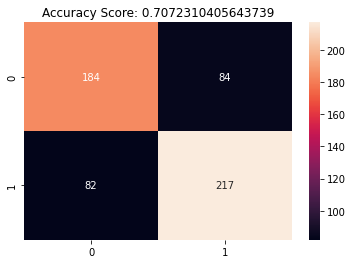

In [12]:
cm_best_model = confusion_matrix(Y_test, y_pred)
acc_best_model = accuracy_score(Y_test, y_pred)
sns.heatmap(cm_best_model, annot = True, fmt='g')
plt.title('Accuracy Score: {0}'.format(acc_best_model))
plt.show()

In [11]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       268
           1       0.72      0.73      0.72       299

    accuracy                           0.71       567
   macro avg       0.71      0.71      0.71       567
weighted avg       0.71      0.71      0.71       567



Recordar:

* 0 ----> La persona está activa.
* 1 ----> La persona está retirada.

El modelo logró identificar correctamente a 184 personas que se habían retirado del trabajo (Verdaderos Positivos), pero también predijo incorrectamente que 84 personas se habían retirado cuando en realidad seguían empleadas (Falsos Positivos). Además, el modelo no logró identificar a 82 personas que se habían retirado del trabajo (Falsos Negativos) y acertó en 217 casos de personas que seguían.

* **Precisión:** mide la proporción de predicciones positivas que son correctas. Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos). Esto significa que de todas las predicciones positivas que hizo tu modelo, el 69% fueron correctas.

* **Recall:** mide la proporción de casos positivos que fueron identificados correctamente por el modelo. Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos). Esto significa que de todas las personas que se retiraron del trabajo, tu modelo logró identificar correctamente al 69%.

# Coeficientes del Modelo

In [35]:
coef = model.coef_[0]
nombres_variables = list(X.columns)


In [44]:
# Crear un dataframe con los coeficientes y los nombres de las variables independientes

df_coef = pd.DataFrame({'Variable' : list(X.columns),
                        'Coeficiente': model.coef_[0]})
df_coef['p_valor'] = df_coef['Coeficiente'].apply(lambda x: stats.norm.sf(abs(x))*2)
df_coef = df_coef.sort_values(by='p_valor', ascending=True)

In [42]:
# Ordenar los coeficientes por valor absoluto de mayor a menor

df_coef['Coeficiente_absoluto'] = abs(df_coef['Coeficiente'])
df_coef = df_coef.sort_values('Coeficiente_absoluto', ascending=True)
df_coef = df_coef.drop(columns=['Coeficiente_absoluto'])


In [45]:
df_coef

,Variable,Coeficiente,p_valor
39,seniority_MASTER,1.385189,0.165995
14,chapter_INTEGRACION,-1.230768,0.218410
30,chapter_UI,1.014860,0.310172
25,chapter_CERTIFICACION,0.997373,0.318583
26,chapter_FRONT MOVIL,0.971439,0.331330
4,area_TALENT POOL,-0.914353,0.360531
31,chapter_INFRAESTRUCTURA,0.827475,0.407968
22,chapter_CALIDAD DE SOFTWARE,-0.796045,0.426006
23,chapter_DEVSECOPS,-0.785916,0.431916
32,chapter_SOA,0.704221,0.481295
